1. [真实素数] 正在生成素数 (N=20000000)...
2. [静态模型] 正在生成全量数据...
3. [老化模型] 正在生成非自治数据 (k=4.5)...
4. 开始绘图...


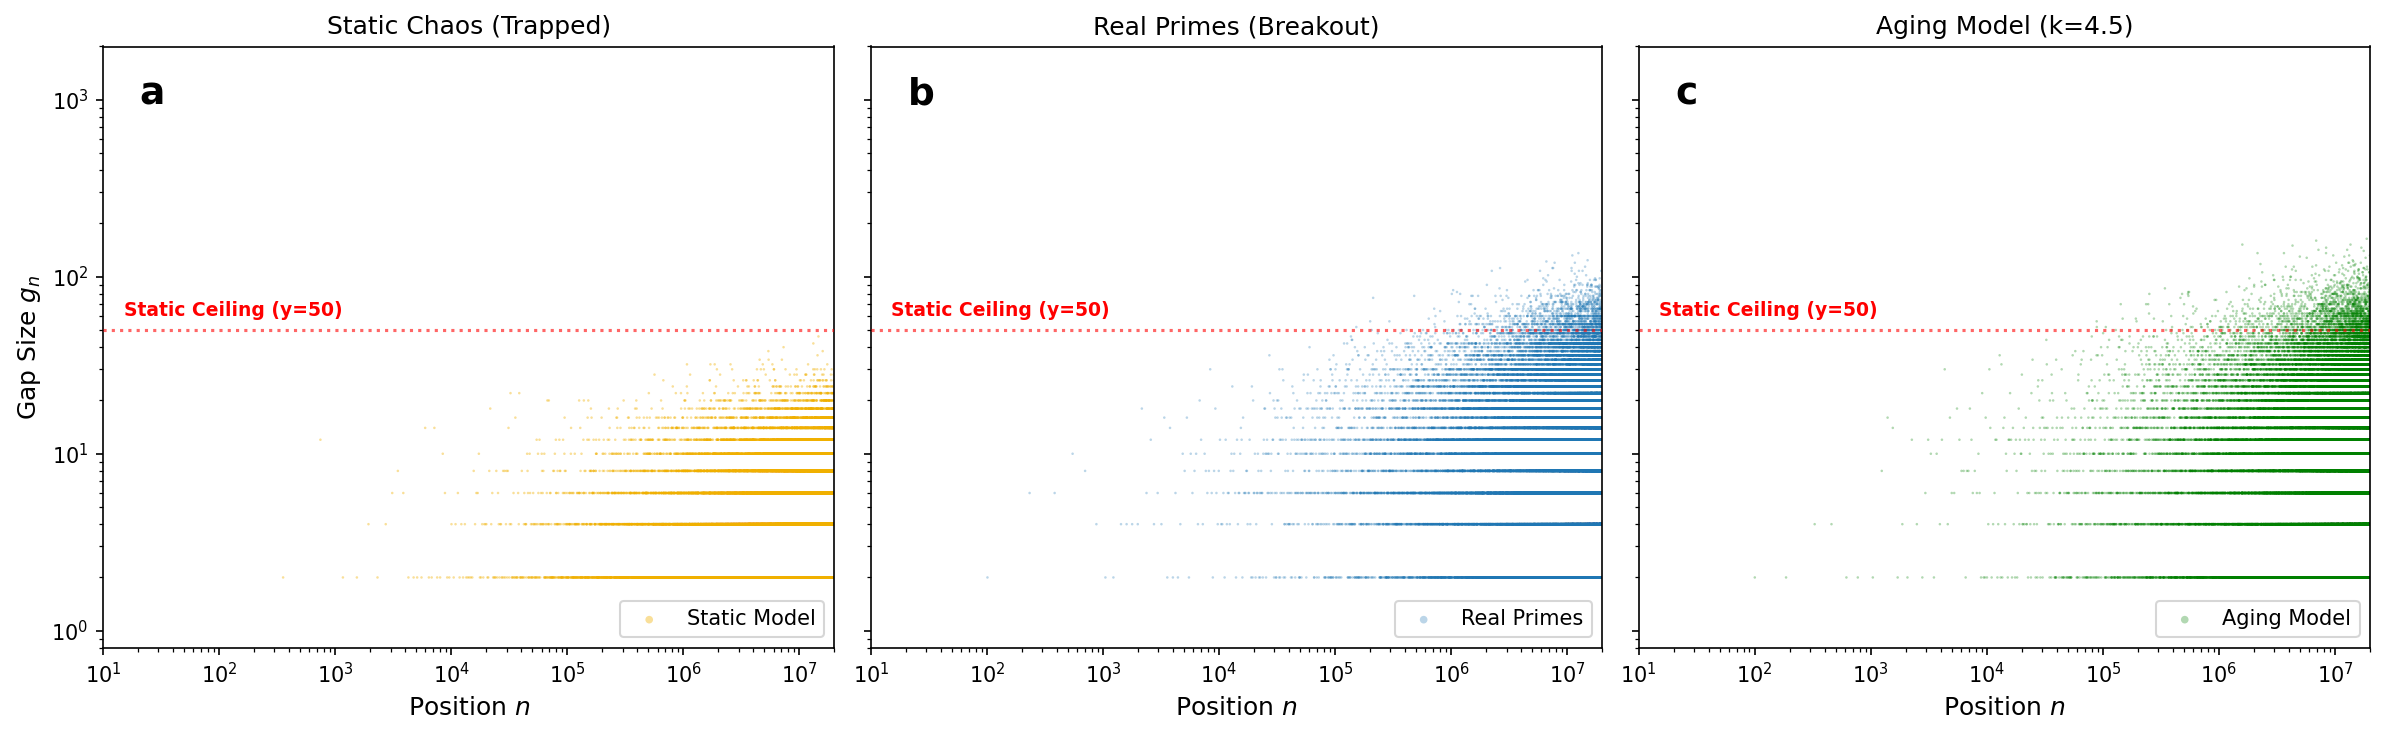

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def study_gap_evolution_lower_ceiling(limit=20000000): # 2000万
    print(f"1. [真实素数] 正在生成素数 (N={limit})...")
    is_prime = np.ones(limit + 1, dtype=bool)
    is_prime[0:2] = False
    for i in range(2, int(limit**0.5) + 1):
        if is_prime[i]:
            is_prime[i*i : limit+1 : i] = False
    primes = np.nonzero(is_prime)[0]
    real_gaps = np.diff(primes)
    real_n = primes[:-1]
    
    print(f"2. [静态模型] 正在生成全量数据...")
    u = 1.543689012692076
    x = 0.1
    static_indices = []
    for i in range(1, limit):
        x = 1 - u * x**2
        if x < 0: 
            static_indices.append(i)
    static_indices = np.array(static_indices)
    static_gaps = np.diff(static_indices)
    static_n = static_indices[:-1]

    print(f"3. [老化模型] 正在生成非自治数据 (k=4.5)...")
    aging_indices = []
    x = 0.1
    k = 4.5 
    for n in range(1, limit):
        x = 1 - u * x**2
        if x < 0:
            prob = k / np.log(n + 2)
            if np.random.random() < prob:
                aging_indices.append(n)
    aging_indices = np.array(aging_indices)
    aging_gaps = np.diff(aging_indices)
    aging_n = aging_indices[:-1]

    # ==========================================
    # 4. 绘图
    # ==========================================
    print("4. 开始绘图...")
    fig, axes = plt.subplots(1, 3, figsize=(16, 5), dpi=150, sharey=True)
    
    xlims = (10, limit)
    ylims = (0.8, 2000) 
    
    # 智能降采样
    step_s = max(1, len(static_n) // 50000) 
    step_r = max(1, len(real_n) // 50000)
    step_a = max(1, len(aging_n) // 50000)
    
    # --- 辅助线函数 (修改这里) ---
    def draw_guides(ax):
        # 【修改点】将 y=100 改为 y=50，位置更低，压迫感更强
        ceiling_y = 50
        ax.axhline(y=ceiling_y, color='red', linestyle=':', alpha=0.6, lw=1.5, zorder=10)
        # 调整文字标签的位置，放在线稍微上方一点
        ax.text(15, ceiling_y * 1.2, f'Static Ceiling (y={ceiling_y})', color='red', fontsize=9, fontweight='bold')

    # --- 图 a: 静态模型 (Static) ---
    ax1 = axes[0]
    ax1.text(0.05, 0.95, 'a', transform=ax1.transAxes, fontsize=18, fontweight='bold', va='top')
    draw_guides(ax1)
    ax1.scatter(static_n[::step_s], static_gaps[::step_s], 
                s=1.5, c='#F0B000', alpha=0.4, edgecolors='none', label='Static Model')
    ax1.set_xscale('log'); ax1.set_yscale('log')
    ax1.set_xlim(xlims); ax1.set_ylim(ylims)
    ax1.set_xlabel('Position $n$', fontsize=12)
    ax1.set_ylabel('Gap Size $g_n$', fontsize=12)
    ax1.set_title('Static Chaos (Trapped)', fontsize=12)
    ax1.legend(loc='lower right', markerscale=3)

    # --- 图 b: 真实素数 (Real) ---
    ax2 = axes[1]
    ax2.text(0.05, 0.95, 'b', transform=ax2.transAxes, fontsize=18, fontweight='bold', va='top')
    draw_guides(ax2)
    ax2.scatter(real_n[::step_r], real_gaps[::step_r], 
                s=1.5, c='#1f77b4', alpha=0.3, edgecolors='none', label='Real Primes')
    ax2.set_xscale('log'); ax2.set_yscale('log')
    ax2.set_xlim(xlims)
    ax2.set_xlabel('Position $n$', fontsize=12)
    ax2.set_title('Real Primes (Breakout)', fontsize=12)
    ax2.legend(loc='lower right', markerscale=3)

    # --- 图 c: 老化模型 (Aging) ---
    ax3 = axes[2]
    ax3.text(0.05, 0.95, 'c', transform=ax3.transAxes, fontsize=18, fontweight='bold', va='top')
    draw_guides(ax3)
    ax3.scatter(aging_n[::step_a], aging_gaps[::step_a], 
                s=1.5, c='#008000', alpha=0.3, edgecolors='none', label='Aging Model')
    ax3.set_xscale('log'); ax3.set_yscale('log')
    ax3.set_xlim(xlims)
    ax3.set_xlabel('Position $n$', fontsize=12)
    ax3.set_title(f'Aging Model (k={k})', fontsize=12)
    ax3.legend(loc='lower right', markerscale=3)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.05)
    plt.savefig('fig4.png')
    plt.show()

# 运行 (大概需要 20-30 秒)
study_gap_evolution_lower_ceiling(limit=20000000)